# 1 

A partir del fichero "US_Crime_Rates_1960_2014", se pide:

1. Tratar el dataset como una serie temporal a partir de la columna Year. Siempre el eje X será el nuevo índice Year.
2. Dibujar todas las columnas numéricas.
3. Como se puede ver en el punto 2, la columna "Population" tiene una magnitud diferente a la de las demás columnas: Dibuja la misma gráfica que antes pero con dos resoluciones diferentes para que se puedan observar con mejor detalle todas las columnas. 
4. A partir de ahora y para el resto del ejercicio, borra las columnas "Population" y "Total" ¿Qué columnas tienen mejor correlación? 
5. A partir de las cinco columnas que tengan mejor correlación con la columna "Murder", entrena un modelo de regresión no lineal a partir de polinomio de grado 6. Este modelo ha de entrenarse siguiendo el esquema recomendado de validación cruzada y almacenando los errores de entrenamiento y validación en cada iteración del entrenamiento.
6. Representa la evolución de los errores de validación y entrenamiento en una gráfica. ¿Ha habido sobreaprendizaje?. Utiliza n_iteraciones=23 y n_repeats=7.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Year'>

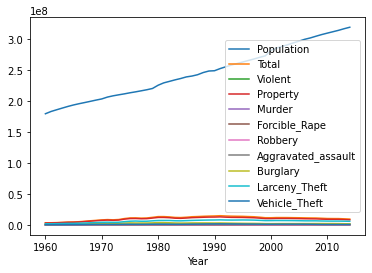

In [10]:
import pandas as pd
df = pd.read_csv("../data/US_Crime_Rates_1960_2014.csv")


df.set_index("Year", inplace=True)

df.plot()

In [12]:
df['index'] = df.index

In [13]:
df.rename(columns={df.columns[11]: "Year"}, inplace = True)

In [14]:
df = df.reset_index(drop = True)

# 4

In [16]:
# Creo un nuevo dataframe sin las columnas 'Population' y 'Total'
df_1 = df.iloc[:, 2:12]  # Primera, tercera y segunda columnas


In [18]:
df_1.corr()

,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft,Year
Violent,1.000000,0.943351,0.795300,0.973914,0.919249,0.981071,0.646607,0.974791,0.909182,0.715312
Property,0.943351,1.000000,0.895641,0.912517,0.965363,0.875536,0.847149,0.980528,0.906130,0.571376
Murder,0.795300,0.895641,1.000000,0.699655,0.960156,0.668511,0.920207,0.806279,0.856600,0.256010
Forcible_Rape,0.973914,0.912517,0.699655,1.000000,0.847794,0.974379,0.588529,0.967417,0.826284,0.825216
Robbery,0.919249,0.965363,0.960156,0.847794,1.000000,0.826500,0.864444,0.920460,0.916280,0.451001
Aggravated_assault,0.981071,0.875536,0.668511,0.974379,0.826500,1.000000,0.498449,0.941906,0.858725,0.792431
Burglary,0.646607,0.847149,0.920207,0.588529,0.864444,0.498449,1.000000,0.734091,0.690423,0.157445
Larceny_Theft,0.974791,0.980528,0.806279,0.967417,0.920460,0.941906,0.734091,1.000000,0.885326,0.703818
Vehicle_Theft,0.909182,0.906130,0.856600,0.826284,0.916280,0.858725,0.690423,0.885326,1.000000,0.436975
Year,0.715312,0.571376,0.256010,0.825216,0.451001,0.792431,0.157445,0.703818,0.436975,1.000000


### Columnas con mejor correlación

In [19]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

# Función para obtener el Top x de correlaciones más altas que queramos

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df_1, 3))


Top Absolute Correlations
Violent   Aggravated_assault    0.981071
Property  Larceny_Theft         0.980528
Violent   Larceny_Theft         0.974791
dtype: float64


Regresión no lineal con las 5 columnas que mejor correlacionan con "Murder"

In [ ]:
A partir de las cinco columnas que tengan mejor correlación con la columna "Murder", entrena un modelo de regresión no lineal a partir de polinomio de grado 6. Este modelo ha de entrenarse siguiendo el esquema recomendado de validación cruzada y almacenando los errores de entrenamiento y validación en cada iteración del entrenamiento.

In [28]:
# las 5 columnas que mejor correlacionan con 'Murder' son: Robbery, Burglary, Property, Vehicle_Theft y Larceny_Theft
# Creamos un nuevo dataframe con estas columnas + la de Murder
df_Murder = df_1.iloc[:, [1,2,4,6,7,8]]


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures # Regresión polinómica
from sklearn.metrics import r2_score, mean_absolute_error


In [31]:
X = df_Murder.iloc[:,[0,2,3,4,5]]
y = df_Murder.iloc[:,[1]]

In [34]:
# Test/train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

################
(44, 462)
y_pred (44, 1)
Score: 0.9999999999999937
MAE: 0.0002193905387767617


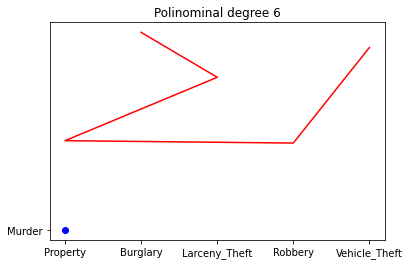

################
(44, 792)
y_pred (44, 1)
Score: 0.9999999999995278
MAE: 0.0019535951953664403


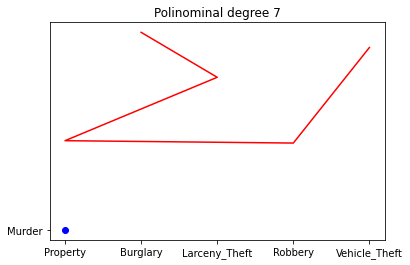

################
(44, 1287)
y_pred (44, 1)
Score: 0.9999999999987281
MAE: 0.003721433148257347


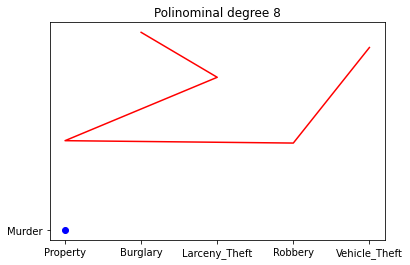

################
(44, 2002)
y_pred (44, 1)
Score: 0.9999999999659376
MAE: 0.014368270745473472


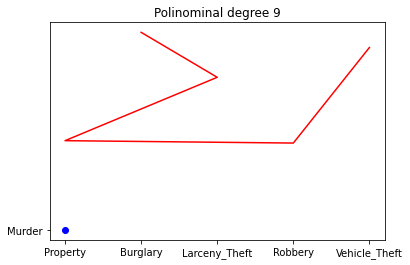

################
(44, 3003)
y_pred (44, 1)
Score: 0.9999835276732517
MAE: 12.254135057321161


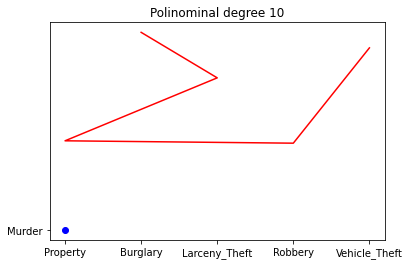

In [36]:
degree_min = 6
degree_max = 10
# Make a pipeline model with polynomial transformation and LASSO regression with cross-validation, run it for increasing degree of polynomial (complexity of the model)
scores = []
for degree in range(degree_min,degree_max+1):
    print("################")
    polinominal_model = PolynomialFeatures(degree) 
    X_poly = polinominal_model.fit_transform(X_train,y_train)

    #######
    
    print(X_poly.shape)

    lin_reg_model = LinearRegression()
    lin_reg_model.fit(X_poly, y_train)
    y_pred = lin_reg_model.predict(X_poly)

    print("y_pred", y_pred.shape)
    print("Score:", r2_score(y_train, y_pred))
    print("MAE:", mean_absolute_error(y_true=y_train, y_pred=y_pred))
    X_train_to_show, y_train_to_show = zip(*sorted(zip(X_train, y_train)))
    plt.scatter(X_train_to_show, y_train_to_show, color='b')
    X_train_to_show, y_pred = zip(*sorted(zip(X_train, y_pred)))
    plt.plot(X_train_to_show, y_pred, color='red')
    plt.title("Polinominal degree " + str(degree))
    plt.show()
    input("Enter to next grade")

################
(44, 7)
y_pred (44, 1)
Score: 0.907893826053966
MAE: 862.40192344159


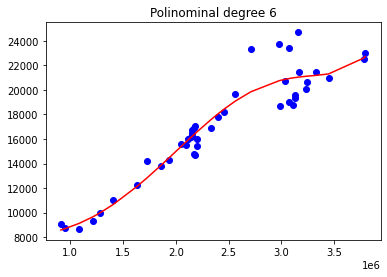

################
(44, 8)
y_pred (44, 1)
Score: 0.9089411514844973
MAE: 910.2597570126183


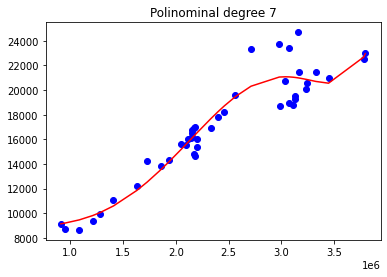

################
(44, 9)
y_pred (44, 1)
Score: 0.9005260093165282
MAE: 1053.1860114493231


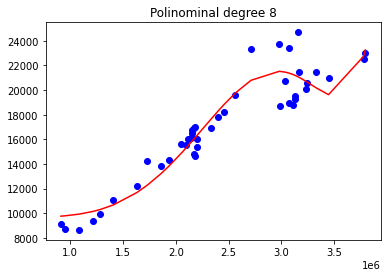

################
(44, 10)
y_pred (44, 1)
Score: 0.8769597469328886
MAE: 1205.2529178532104


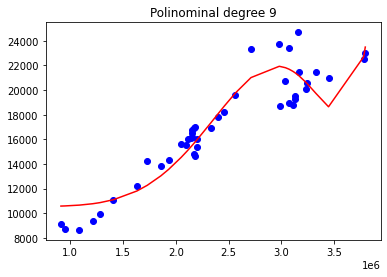

################
(44, 11)
y_pred (44, 1)
Score: 0.8383387295721245
MAE: 1382.312008713148


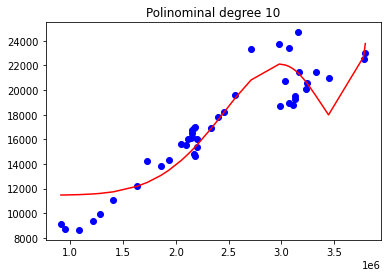

In [58]:
degree_min = 6
degree_max = 10
# Make a pipeline model with polynomial transformation and LASSO regression with cross-validation, run it for increasing degree of polynomial (complexity of the model)
scores = []
for degree in range(degree_min,degree_max+1):
    print("################")
    polinominal_model = PolynomialFeatures(degree) 
    X_poly = polinominal_model.fit_transform(X_train.reshape(-1, 1),y_train)

    #######
    
    print(X_poly.shape)

    lin_reg_model = LinearRegression()
    lin_reg_model.fit(X_poly, y_train)
    y_pred = lin_reg_model.predict(X_poly)

    print("y_pred", y_pred.shape)
    print("Score:", r2_score(y_train, y_pred))
    print("MAE:", mean_absolute_error(y_true=y_train, y_pred=y_pred))
    X_train_to_show, y_train_to_show = zip(*sorted(zip(X_train, y_train)))
    plt.scatter(X_train_to_show, y_train_to_show, color='b')
    X_train_to_show, y_pred = zip(*sorted(zip(X_train, y_pred)))
    plt.plot(X_train_to_show, y_pred, color='red')
    plt.title("Polinominal degree " + str(degree))
    plt.show()

In [ ]:
Representa la evolución de los errores de validación y entrenamiento en una gráfica. ¿Ha habido sobreaprendizaje?. Utiliza n_iteraciones=23 y n_repeats=7.

In [61]:
X = df_Murder['Property']
y = df_Murder['Murder']

In [62]:
# Test/train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [64]:
degree_min = 6
degree_max = 10
# Make a pipeline model with polynomial transformation and LASSO regression with cross-validation, run it for increasing degree of polynomial (complexity of the model)
scores = []
for degree in range(degree_min,degree_max+1):
    print("################")
    polinominal_model = PolynomialFeatures(degree) 
    X_poly = polinominal_model.fit_transform(X_train,y_train)

    #######
    
    print(X_poly.shape)

    lin_reg_model = LinearRegression()
    lin_reg_model.fit(X_poly, y_train)
    y_pred = lin_reg_model.predict(X_poly)

    print("y_pred", y_pred.shape)
    print("Score:", r2_score(y_train, y_pred))
    print("MAE:", mean_absolute_error(y_true=y_train, y_pred=y_pred))
    X_train_to_show, y_train_to_show = zip(*sorted(zip(X_train, y_train)))
    plt.scatter(X_train_to_show, y_train_to_show, color='b')
    X_train_to_show, y_pred = zip(*sorted(zip(X_train, y_pred)))
    plt.plot(X_train_to_show, y_pred, color='red')
    plt.title("Polinominal degree " + str(degree))
    plt.show()

################


ValueError: Expected 2D array, got 1D array instead:
array=[11805300 10608500  4200400  9278700 12218800 10345500  3095700 12131900
 10252700 12063700  6125200  9767915  9052743 11652000  6749000 10182586
  8650761 10208334 12505900 11722700 11041500  3792500 10123400  3450700
  4793300 11558175 10174754 10455277  9955000 12655500 12024700  9843481
  7771700 12605400 12063900 12961100  9001992 12061900 11102600 10944590
  4352000  7842200 10850500  9337060].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [60]:
# Test/train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

AttributeError: 'Series' object has no attribute 'reshape'

In [55]:
from sklearn.svm import SVR


In [56]:
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=6, epsilon=.1, coef0=1)

In [57]:
model = svr_poly.fit(X, y)
print("model.score:", model.score(X, y))
y_prediction = model.predict(X)
plt.scatter(X, y, color='red')
plt.scatter(X, y_prediction, color='green', alpha=0.3)
plt.plot(X, y_prediction, color='green')

ValueError: Expected 2D array, got 1D array instead:
array=[ 3095700.  3198600.  3450700.  3792500.  4200400.  4352000.  4793300.
  5403500.  6125200.  6749000.  7359200.  7771700.  7413900.  7842200.
  9278700. 10252700. 10345500.  9955000. 10123400. 11041500. 12063700.
 12061900. 11652000. 10850500. 10608500. 11102600. 11722700. 12024700.
 12356900. 12605400. 12655500. 12961100. 12505900. 12218800. 12131900.
 12063900. 11805300. 11558175. 10944590. 10208334. 10182586. 10437480.
 10455277. 10442862. 10319386. 10174754.  9983568.  9843481.  9767915.
  9337060.  9112625.  9052743.  9001992.  8650761.  8277829.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.